## FDL- DSBA Assignment 2021-2022

### Please fill the blanks in the code and answer to the questions that are asked in the Jupyter Notebook ("Markdown" cell). 

### Instructions: Rename the jupyter adding your name at the end of the title FDL_Assignment-<YOUR NAME\>.ipynb

### Send your solution to fdl.dsba@gmail.com by 20 / 12 / 2021, as subject for the mail please put FDL_Assignment-<YOUR NAME\>

### Question 1 -  TRAIN ON CIFAR DATASET
In this exercise you are asked to train a Convolutional Neural Network (CNN) on the CIFAR10 dataset and visualize its feature maps.

1a) Download the CIFAR10 dataset using the already provided PyTorch dataloaders. 
*   Read and understand the following code
*   Feel free to add additional transformations for data augmentation. Explain if so. 

In [1]:
## Download the CIFAR10 dataset using the PyTorch dataloaders
import json 
from pprint import pprint
import torch
import torchvision
import torchvision.transforms as transforms

# *****START CODE 
## Data
##Here you are free to add further transform functions if you wish
print('==> Preparing data..')
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
])
#Batch size chosen = 4
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_dataloader = torch.utils.data.DataLoader(trainset,batch_size=4, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
val_dataloader = torch.utils.data.DataLoader(testset,batch_size=4, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
# *****END CODE

==> Preparing data..


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [2]:
#Check for GPU usage
torch.cuda.is_available()

True

In [3]:
train_dataloader

In [4]:
#Set device to run on GPU 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

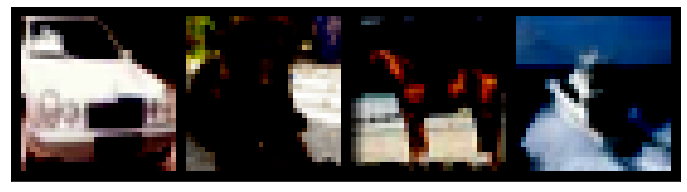

In [5]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

#Show images 
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

show_batch(train_dataloader)

1b) Create your convolutional neural network.
*   Go to https://dljudge.io/generate + /<YOUR NAME\> or use curl below
*   Save the page as json 
*   Build your CNN architecture based on those modules and hyperparameters
*   Use the right value for 'COMPUTE' 
*   See the example below

In [6]:
!curl https://dljudge.io/generate/johnsmith -o network1.json

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2486  100  2486    0     0   2241      0  0:00:01  0:00:01 --:--:--  2241


In [7]:
def validate_network(model, input_dict):
    """
    Validate if your network definition is same as provided archtiecture
    """
    output = {}
    i = 1
    for layer in model.children():
        if isinstance(layer, nn.Conv2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Conv2d',
                                                  'kernel_size': layer.kernel_size[0],
                                                   'input': layer.in_channels,
                                                   'output': layer.out_channels,
                                                   'padding': layer.padding[0]}

        if isinstance(layer, nn.ReLU):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'ReLU'}

        if isinstance(layer, nn.MaxPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'MaxPool2d',
                                                  'kernel_size': layer.kernel_size,
                                                  'stride': layer.stride}

        if isinstance(layer, nn.AdaptiveAvgPool2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'AdaptiveAvgPool2d',
                                                  'output': layer.output_size}

        if isinstance(layer, nn.BatchNorm2d):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'BatchNorm2d',
                                                  'input': layer.num_features}

        if isinstance(layer, nn.Dropout):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Dropout',
                                                  'p': layer.p}

        if isinstance(layer, nn.Linear):
            output[f'Layer_{str(i).zfill(3)}'] = {'type': 'Linear',
                                                  'input': layer.in_features,
                                                  'output': layer.out_features}

        i += 1

    
    correct = True
    for l in output.keys():
        if l in input_dict:
            inp_kvs = input_dict[l]
            out_kvs = output[l]
            for k in out_kvs:
                if inp_kvs[k] != 'COMPUTE':
                    if out_kvs[k] != inp_kvs[k]:
                        print (f'Error in {l}, {k}!')
                        correct = False

    if correct:
        print ('OK!')

In [8]:
# *****START CODE 
# Import your individual architecture dictionnary here
fin = open("../input/cnn-json-file/saurajverma.json", 'r')
my_architecture_dict = json.load(fin)
fin.close()

pprint(my_architecture_dict)
# *****END CODE

{'Layer_001': {'input': 3,
               'kernel_size': 3,
               'output': 55,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_002': {'type': 'ReLU'},
 'Layer_003': {'input': 55,
               'kernel_size': 3,
               'output': 55,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_004': {'type': 'ReLU'},
 'Layer_005': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_006': {'input': 55,
               'kernel_size': 3,
               'output': 139,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_007': {'type': 'ReLU'},
 'Layer_008': {'input': 139,
               'kernel_size': 3,
               'output': 139,
               'padding': 1,
               'type': 'Conv2d'},
 'Layer_009': {'type': 'ReLU'},
 'Layer_010': {'kernel_size': 2, 'stride': 2, 'type': 'MaxPool2d'},
 'Layer_011': {'input': 139,
               'kernel_size': 3,
               'output': 240,
               'padding': 1,
 

In [9]:
from torch.nn.modules.dropout import Dropout
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        """
        Number of layers should be exactly same as in the provided JSON. 
        Do not use any grouping function like Sequential 
        """
        self.conv1 = nn.Conv2d(3,55,kernel_size=3,padding=1)
        self.activation1 = nn.ReLU()
        self.conv2 = nn.Conv2d(55,55,kernel_size=3,padding=1)
        self.activation2 = nn.ReLU()
        self.pooling1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv3 = nn.Conv2d(55,139,kernel_size=3,padding=1)
        self.activation3 = nn.ReLU()
        self.conv4 = nn.Conv2d(139,139,kernel_size=3,padding=1)
        self.activation4 = nn.ReLU()
        self.pooling2 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv5 = nn.Conv2d(139,240,kernel_size=3,padding=1)
        self.activation5 = nn.ReLU()
        self.conv6 = nn.Conv2d(240,240,kernel_size=3,padding=1)
        self.activation6 = nn.ReLU()
        self.conv7 = nn.Conv2d(240,240,kernel_size=3,padding=1)
        self.activation7 = nn.ReLU()
        self.conv8 = nn.Conv2d(240,240,kernel_size=3,padding=1)
        self.activation8 = nn.ReLU()
        self.pooling3 = nn.MaxPool2d(2,2)
        self.conv9 = nn.Conv2d(240,504,kernel_size=3,padding=1)
        self.activation9 = nn.ReLU()
        self.conv10 = nn.Conv2d(504,504,kernel_size=3,padding=1)
        self.activation10 = nn.ReLU()
        self.conv11 = nn.Conv2d(504,504,kernel_size=3,padding=1)
        self.activation11 = nn.ReLU()
        self.conv12 = nn.Conv2d(504,504,kernel_size=3,padding=1)
        self.activation12 = nn.ReLU()
        self.pooling4 = nn.MaxPool2d(2,2)
        self.conv13 = nn.Conv2d(504,504,kernel_size=3,padding=1)
        self.activation13 = nn.ReLU()
        self.conv14 = nn.Conv2d(504,504,kernel_size=3,padding=1)
        self.activation14 = nn.ReLU()
        self.conv15 = nn.Conv2d(504,504,kernel_size=3,padding=1)
        self.activation15 = nn.ReLU()
        self.conv16 = nn.Conv2d(504,504,kernel_size=3,padding=1)
        self.activation16 = nn.ReLU()
        self.pooling5 = nn.MaxPool2d(2,2)
        self.pooling6 = nn.AdaptiveAvgPool2d((1,1))
        self.dropout = Dropout(0.44835135515457525)
        self.linear1 = nn.Linear(504,2085)
        self.activation17 = nn.ReLU()
        self.linear2 = nn.Linear(2085,10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.activation1(x)
        x = self.conv2(x)
        x = self.activation2(x)
        x = self.pooling1(x)
        x = self.conv3(x)
        x = self.activation3(x)
        x = self.conv4(x)
        x = self.activation4(x)
        x = self.pooling2(x)
        x = self.conv5(x)
        x = self.activation5(x)
        x = self.conv6(x)
        x = self.activation6(x)
        x = self.conv7(x)
        x = self.activation7(x)
        x = self.conv8(x)
        x = self.activation8(x)
        x = self.pooling3(x)
        x = self.conv9(x)
        x = self.activation9(x)
        x = self.conv10(x)
        x = self.activation10(x)
        x = self.conv11(x)
        x = self.activation11(x)
        x = self.conv12(x)
        x = self.activation12(x)
        x = self.pooling4(x)
        x = self.conv13(x)
        x = self.activation13(x)
        x = self.conv14(x)
        x = self.activation14(x)
        x = self.conv15(x)
        x = self.activation15(x)
        x = self.conv16(x)
        x = self.activation16(x)
        x = self.pooling5(x)
        x = self.pooling6(x)
        x = torch.flatten(x,1) #Flatten layer 
        x = self.dropout(x)
        x = self.linear1(x)
        x = self.activation17(x)
        x = self.linear2(x)
        return x
# *****END CODE

I also wrote down **LeNet** since the above architecture implementation seemed to perform really bad, hence I wanted to make sure that the performance hindrance was not from my side but rather because of the network architecture. 

In [10]:
# class LeNet(nn.Module):
#     def __init__(self):
#         super(LeNet, self).__init__()
#         self.conv1 = nn.Conv2d(3, 16, 3, 1, padding=1) # input is color image, hence 3 i/p channels. 16 filters, kernal size is tuned to 3 to avoid overfitting, stride is 1 , padding is 1 extract all edge features.
#         self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1) # We double the feature maps for every conv layer as in pratice it is really good.
#         self.conv3 = nn.Conv2d(32, 64, 3, 1, padding=1)
#         self.fc1 = nn.Linear(4*4*64, 500) # I/p image size is 32*32, after 3 MaxPooling layers it reduces to 4*4 and 64 because our last conv layer has 64 outputs. Output nodes is 500
#         self.fc2 = nn.Linear(500, 10) # output nodes are 10 because our dataset have 10 different categories
#     def forward(self, x):
#         x = F.relu(self.conv1(x)) #Apply relu to each output of conv layer.
#         x = F.max_pool2d(x, 2, 2) # Max pooling layer with kernal of 2 and stride of 2
#         x = F.relu(self.conv2(x))
#         x = F.max_pool2d(x, 2, 2)
#         x = F.relu(self.conv3(x))
#         x = F.max_pool2d(x, 2, 2)
#         x = x.view(-1, 4*4*64) # flatten our images to 1D to input it to the fully connected layers
#         x = F.relu(self.fc1(x))
#         x = self.fc2(x)
#         return x

In [11]:
conv1 = nn.Conv2d(3,55,kernel_size=3,padding=1)
conv2 = nn.Conv2d(55,55,kernel_size=3,padding=1)
pooling1 = nn.MaxPool2d(kernel_size=2,stride=2)
conv3 = nn.Conv2d(55,139,kernel_size=3,padding=1)
conv4 = nn.Conv2d(139,139,kernel_size=3,padding=1)
pooling2 = nn.MaxPool2d(kernel_size=2,stride=2)
conv5 = nn.Conv2d(139,240,kernel_size=3,padding=1)
conv6 = nn.Conv2d(240,240,kernel_size=3,padding=1)
conv7 = nn.Conv2d(240,240,kernel_size=3,padding=1)
conv8 = nn.Conv2d(240,240,kernel_size=3,padding=1)
pooling3 = nn.MaxPool2d(2,2)
conv9 = nn.Conv2d(240,504,kernel_size=3,padding=1)
conv10 = nn.Conv2d(504,504,kernel_size=3,padding=1)
conv11 = nn.Conv2d(504,504,kernel_size=3,padding=1)
conv12 = nn.Conv2d(504,504,kernel_size=3,padding=1)
pooling4 = nn.MaxPool2d(2,2)
conv13 = nn.Conv2d(504,504,kernel_size=3,padding=1)
conv14 = nn.Conv2d(504,504,kernel_size=3,padding=1)
conv15 = nn.Conv2d(504,504,kernel_size=3,padding=1)
conv16 = nn.Conv2d(504,504,kernel_size=3,padding=1)
pooling5 = nn.MaxPool2d(2,2)
pooling6 = nn.AdaptiveAvgPool2d((1,1))


dataiter = iter(train_dataloader)
images,labels = dataiter.next()

print(images.shape)

x = conv1(images)
print(x.shape)
x = conv2(x)
print(x.shape)
x = pooling1(x)
print(x.shape)
x = conv3(x)
print(x.shape)
x = conv4(x)
print(x.shape)
x = pooling2(x)
print(x.shape)
x = conv5(x)
print(x.shape)
x = conv6(x)
print(x.shape)
x = conv7(x)
print(x.shape)
x = conv8(x)
print(x.shape)
x = pooling3(x)
print(x.shape)
x = conv9(x)
print(x.shape)
x = conv10(x)
print(x.shape)
x = conv11(x)
print(x.shape)
x = conv12(x)
print(x.shape)
x = pooling4(x)
print(x.shape)
x = conv13(x)
print(x.shape)
x = conv14(x)
print(x.shape)
x = conv15(x)
print(x.shape)
x = conv16(x)
print(x.shape)
x = pooling5(x)
print(x.shape)
x = pooling6(x)
print(x.shape)
x = torch.flatten(x,1)
print(x.shape)


torch.Size([4, 3, 32, 32])
torch.Size([4, 55, 32, 32])
torch.Size([4, 55, 32, 32])
torch.Size([4, 55, 16, 16])
torch.Size([4, 139, 16, 16])
torch.Size([4, 139, 16, 16])
torch.Size([4, 139, 8, 8])
torch.Size([4, 240, 8, 8])
torch.Size([4, 240, 8, 8])
torch.Size([4, 240, 8, 8])
torch.Size([4, 240, 8, 8])
torch.Size([4, 240, 4, 4])
torch.Size([4, 504, 4, 4])
torch.Size([4, 504, 4, 4])
torch.Size([4, 504, 4, 4])
torch.Size([4, 504, 4, 4])
torch.Size([4, 504, 2, 2])
torch.Size([4, 504, 2, 2])
torch.Size([4, 504, 2, 2])
torch.Size([4, 504, 2, 2])
torch.Size([4, 504, 2, 2])
torch.Size([4, 504, 1, 1])
torch.Size([4, 504, 1, 1])
torch.Size([4, 504])


1c) Create the training scheme
*    Initialize the model
*    Validate the model
*    Specify the training hyperparameters like type of optimizer, criterion and learning rate
*    Specify number of epochs

In [12]:
# *****START CODE
lr = 0.01
model = ConvNet().to(device) #Original JSON architecture
# model2 = LeNet().to(device) #LeNet for sanity check 
optimizer = torch.optim.SGD(model.parameters(),lr=lr)
# optimizer2 = torch.optim.SGD(model2.parameters(),lr=lr)
criterion = nn.CrossEntropyLoss()
epochs = 10
# *****END CODE

In [13]:
validate_network(model, my_architecture_dict)

OK!


1d) Plot the train and validation loss curves for the entire training process
*   Validate the model after each epoch
*   Plot both training and validation loss curves
*   Write a small description discussing about the curves. What is the behaviour of the model?

We first train on **ConvNet** for 10 epochs and assess the training and validation losses. 

In [14]:
## Train the model and validate it after each epoch.
## Provide the train-val loss graph.
train_losslist = []
train_accuracylist = []
valid_losslist = []
valid_accuracylist = []
# *****START CODE
for i in range(epochs):  # loop over  the dataset multiple times

    train_loss = 0.0
    valid_loss = 0.0
    
    for inputs, labels in train_dataloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        # zero the parameter gradi ents
        optimizer.zero_grad()

        # forward + backward + optimize
        output = model(inputs)
        #Train loss
        loss = criterion(output, labels)
        # train_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        #Update training loss 
        train_loss += loss.item()

        #Model Validation
    else:
        model.eval() #Put model in validation mode 
        with torch.no_grad(): #Gradient tape is cancelled for validation
            for val_inputs, val_labels in val_dataloader:
                val_inputs = val_inputs.to(device)
                val_labels = val_labels.to(device)
                val_output = model(val_inputs)
                val_loss = criterion(val_output,val_labels)
                valid_loss += val_loss.item()
        

#         Calculate losses 
        train_loss = train_loss/len(train_dataloader)
        valid_loss = valid_loss/len(val_dataloader)

        train_losslist.append(train_loss)
        valid_losslist.append(valid_loss)

#         Print epoch training
        print('Epoch: {} \tTraining Loss: {:.4f}'.format(
        i+1, train_loss))
        print('Epoch: {} \tValidation Loss: {:.4f}'.format(
        i+1, valid_loss))

print('Finished Training')

# *****END CODE

Epoch: 1 	Training Loss: 2.3038
Epoch: 1 	Validation Loss: 2.3031
Epoch: 2 	Training Loss: 2.3036
Epoch: 2 	Validation Loss: 2.3035
Epoch: 3 	Training Loss: 2.3036
Epoch: 3 	Validation Loss: 2.3030
Epoch: 4 	Training Loss: 2.3034
Epoch: 4 	Validation Loss: 2.3033
Epoch: 5 	Training Loss: 2.3035
Epoch: 5 	Validation Loss: 2.3030
Epoch: 6 	Training Loss: 2.3034
Epoch: 6 	Validation Loss: 2.3030
Epoch: 7 	Training Loss: 2.3033
Epoch: 7 	Validation Loss: 2.3031
Epoch: 8 	Training Loss: 2.3033
Epoch: 8 	Validation Loss: 2.3030
Epoch: 9 	Training Loss: 2.3033
Epoch: 9 	Validation Loss: 2.3033
Epoch: 10 	Training Loss: 2.3033
Epoch: 10 	Validation Loss: 2.3029
Finished Training


In [15]:
train_losslist

[2.3038407355880737,
 2.303601491851807,
 2.30355367975235,
 2.303422336292267,
 2.303489441165924,
 2.303441138305664,
 2.3033390181922915,
 2.3033496164894105,
 2.3033122843933107,
 2.303292847671509]

Now we train **LeNet** for sanity check to ensure that our original **ConvNet** is performing worse than SOTA benchmarks.

In [16]:
# train_losslist_lenet = []
# valid_losslist_lenet = []
# # *****START CODE
# for i in range(epochs):  # loop over  the dataset multiple times

#     train_loss_lenet = 0.0
#     valid_loss_lenet = 0.0
    
#     for inputs, labels in train_dataloader:
#         inputs = inputs.to(device)
#         labels = labels.to(device)
        
#         # zero the parameter gradi ents
#         optimizer2.zero_grad()

#         # forward + backward + optimize
#         output = model2(inputs)
#         #Train loss
#         loss = criterion(output, labels)
#         # train_loss.append(loss.item())
#         loss.backward()
#         optimizer2.step()
#         #Update training loss 
#         train_loss_lenet += loss.item()

#         #Model Validation
#     else:
#         with torch.no_grad(): #Gradient tape is cancelled for validation
#             for val_inputs, val_labels in val_dataloader:
#                 val_inputs = val_inputs.to(device)
#                 val_labels = val_labels.to(device)
#                 val_output = model2(val_inputs)
#                 val_loss = criterion(val_output,val_labels)
#                 valid_loss_lenet += val_loss.item()
        

# #         Calculate losses 
#         train_loss_lenet = train_loss_lenet/len(train_dataloader)
#         valid_loss_lenet = valid_loss_lenet/len(val_dataloader)

#         train_losslist_lenet.append(train_loss_lenet)
#         valid_losslist_lenet.append(valid_loss_lenet)

# #         Print epoch training
#     print('Epoch: {} \tTraining Loss: {:.4f}'.format(
#     i+1, train_loss_lenet))
#     print('Epoch: {} \tValidation Loss: {:.4f}'.format(
#     i+1, valid_loss_lenet))


#         # with torch.no_grad():
#         #     for i, val_data in enumerate(val_dataloader,0):
#         #         inputs_val = val_data[0].to(device)
#         #         labels_val = val_data[1].to(device)

#         #         model.eval()

#         #         output_hat = model(inputs_val)
#         #         val_loss = criterion(output_hat,labels_val)
#         #         valid_loss.append(val_loss)


# print('Finished Training')


In [17]:
len(train_dataloader.dataset)

50000

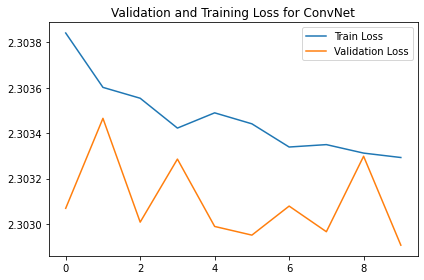

In [18]:
#Let's plot the train loss and validation loss for both the models 
# fig, ax = plt.subplots(1, 2, figsize=(10,10))

plt.plot(train_losslist)
plt.plot(valid_losslist)
plt.legend(['Train Loss','Validation Loss'])
plt.title("Validation and Training Loss for ConvNet")
plt.tight_layout()

In [19]:
# plt.plot(train_losslist_lenet)
# plt.plot(valid_losslist_lenet)
# plt.legend(['Train Loss','Validation Loss'])
# plt.title("Validation and Training Loss for LeNet")
# plt.tight_layout()

1e) Get an intermediate layer from your convolutional neural network and visualize what patterns the network has learned
*   Complete the following code that visualizes the patterns of the network
*   Write a small description commenting on the visualized maps. What do you observe in the different visualizations of the feature maps?

In [20]:
# The intermediate layer you should visualize:
print('My intermediate layer to visualize is: %s'%(my_architecture_dict['Layer_012']))

My intermediate layer to visualize is: {'type': 'ReLU'}


Filter 0. Epoch 100. Loss = 0.0000
Filter 1. Epoch 100. Loss = 0.0000
Filter 2. Epoch 100. Loss = 0.0000
Filter 3. Epoch 100. Loss = 0.0000


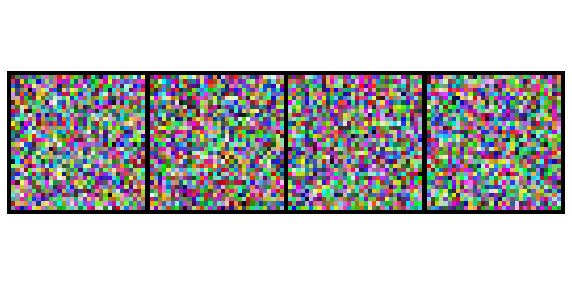

In [21]:
import sys
from skimage import io
import torchvision.utils as vutils

##function for printing the loss during optimization
def write_flush(text, stream=sys.stdout):
    stream.write(text)
    stream.flush()
    return

## Number of feature maps in the intermediate layer that you have chosen. 
# *****START CODE
n_conv = 4
# *****END CODE

## Size of visualised filter.
img_size = 32

##load your optimal model
# *****START CODE
model = ConvNet()
# model.load_state_dict(torch.load('drive/..../model.pt')) 
# *****END CODE

## Create a submodel, until the intermediate layer of your choice.
## Hint: Use model.#name# to create the succession of layers, where #name#
## stands for the layer names that you defined in the initialization function 
## of your model.
# *****START CODE
submodel = nn.Sequential(model.conv1,
        model.activation1,
        model.conv2,
        model.activation2,
        model.pooling1,
        model.conv3,
        model.activation3,
        model.conv4,
        model.activation4,
        model.pooling2,
        model.conv5,
        model.activation5,
        
)
# *****END CODE


relu_list = []
activation = {}
def getActivation(name):
    #Hook signature
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

## Put submodel in eval mode.
submodel.eval()
submodel[11].register_forward_hook(getActivation('relu'))

## Tensor to visualised filters. 
img_stack = torch.zeros((n_conv, 3, img_size, img_size))

## Number of epochs to run for every filter. 
# *****START CODE
n_epochs_per_filt = 100
# *****END CODE

criterion = nn.MSELoss()

# Visualise every convolution. 
for c in range(n_conv):
    ## Initialise with random image. 
    img = torch.rand(1, 3, img_size, img_size).float()

    ## Turn on gradient calculation on the image
    # *****START CODE
    torch.enable_grad()
    # *****END CODE
 
    ## Define optimizer.
    # *****START CODE
    optimizer = torch.optim.Adam(submodel.parameters(),lr=0.001)
    # *****END CODE
    
    for f in range(n_epochs_per_filt):
        optimizer.zero_grad()

        ## Feedforward propagation
        ## Hint: In order to find the loss, compupte the negative of the activation of the hidden layer. 
        ## The objective is to produce an input image which maximizes the activation 
        ## of neurons in a particular hidden layer. 
        # *****START CODE
        x = submodel(img)
        h1 = activation['relu']
        loss = criterion(x,-h1)
        loss.backward()
        optimizer.step()
        
        
        # *****END CODE
        write_flush('\rFilter %d. Epoch %d. Loss = %.4f'%(c, f+1, loss.item()))

    write_flush('\n')
    img_stack[c, :, :, :] = img[0].detach()
    h1.detach()

## Make grid out of visualized filters. 
##Here you may have to adjust the properties of vutils.make_grid, depending on your needs. 
##For example, you may need to change the number of rows.
G = vutils.make_grid(img_stack, nrow=8, normalize=True, padding=1).permute(1,2,0).numpy()
plt.figure(figsize=(10,5))
plt.imshow(G)
plt.axis('equal')
plt.axis('off')
plt.show()

Output: Looking at the output, we can see that the intermediate layers of the CNN are learning pixelated patterns about the network. At first sight, it might seem like nothing, but this is happening due to the fact that our network is indeed too deep and the network is perhaps unable to determine the various features in the image.

1f) Use GradCAM algorithm to visualize the saliency maps of your trained model at the same intermediate layer
*   Install pytorch grad cam package if needed (https://github.com/jacobgil/pytorch-grad-cam)
*   Complete the following code that visualizes GradCAM heatmaps on an input image from your model
*   Try on several input images / classes. 
*   Write a small description commenting on the visualized heatmaps. 

In [22]:
# Install pytorch grad cam package
! pip install grad-cam

     |████████████████████████████████| 4.5 MB 5.1 MB/s            
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
  Created wheel for grad-cam: filename=grad_cam-1.3.7-py3-none-any.whl size=25953 sha256=ec0c6735714e38094515961cdb7854318fada6b2feb7f56db9a38cf5f8a9b685
  Stored in directory: /root/.cache/pip/wheels/30/ab/9c/53c523785edffdc6c61755cf82e0dac3342d0d36190c187894
Successfully built grad-cam


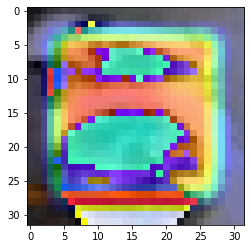

In [23]:
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
import numpy as np 
use_cuda = True

# *****START CODE
model = ConvNet()
# model.load_state_dict(torch.load('drive/..../model.pt'))

inputs, targets = iter(train_dataloader).next()

# Get your intermediate layer
target_layers = [model.conv8]

# convert_tensor = transforms.ToTensor()
rgb_img = np.transpose(inputs[1],(2,1,0)).numpy().reshape((32,32,3))
input_tensor = torch.unsqueeze(inputs[1],0) # Create an input tensor from your image for your model..
# Note: input_tensor can be a batch tensor with several images!
target_category = targets[1]
# *****END CODE

# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=use_cuda)

# You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
grayscale_cam = cam(input_tensor=input_tensor, targets=None,
                   aug_smooth=True,
                   eigen_smooth=True)

# In this example grayscale_cam has only one image in the batch:
grayscale_cam = grayscale_cam[0, :]
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# Plot figure
plt.figure()
plt.imshow(visualization)

### Question 2 - Train on geometrical shapes

Function 'generate_a_triangle' produces images depicting random triangles along with the (x,y) coordinates of the vertices. Create a convolutional neural network that receives as input the triangle image and predicts the corresponding (x,y) coordinates of the triangle's vertices. 
*  Read and understand the following code

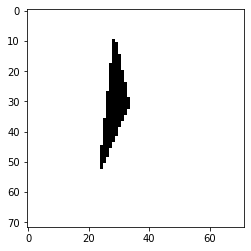

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_triangle():
    figsize = 1.0
    U = np.random.random(3)
    V = np.random.random(3)
    imdata = generate_a_drawing(figsize, U, V)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]

[im, v] = generate_a_triangle()
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

def generate_dataset_regression(nb_samples):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle()
    X = X / 255
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300)
    return [X_test, Y_test]

2a) Use function 'generate_dataset_regression' to create the dataset. Split the dataset to training and validation parts.

In [25]:
##generate dataset
# *****START CODE
X,y = generate_dataset_regression(10_000)
# *****END CODE

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2

In [26]:
#Reshape the X dimension to (10000,72,72)
X = X.reshape(10000,1,72,72)

In [27]:
##split the dataset to training and validation parts
# *****START CODE
X_train, y_train = X[:8000],y[:8000]
X_val, y_val = X[8000:],y[8000:]

# X_train = torch.from_numpy(X_train)
# y_train = torch.from_numpy(y_train)

# /
from torch.utils.data import Dataset, DataLoader
class TriangleDataset(Dataset):

    def __init__(self, X_train, y_train):
        self.x = X_train
        self.y = y_train
        self.n_samples = len(y_train)

    def __getitem__(self,index):
        return self.x[index],self.y[index]

    def __len__(self):
        return self.n_samples
    
transform_train = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

#Create a DataLoader training and validation set 
torch.set_default_dtype(torch.float32)
training_set = TriangleDataset(X_train, y_train)
validation_set = TriangleDataset(X_val,y_val)
train_dataloader = DataLoader(training_set,batch_size=4,shuffle=True)
val_dataloader = DataLoader(validation_set,batch_size=4,shuffle=True)

data_iter = iter(train_dataloader)
val_data_iter = iter(val_dataloader)
images,labels = data_iter.next()
images,labels = images, labels
val_images, val_labels = val_data_iter.next()
val_images, val_labels = val_images, val_labels
# *****END CODE

2b) Use function 'generate_test_set' to create the testing dataset.

In [28]:
##generate test dataset
# *****START CODE
test_data = generate_test_set_regression()
X_test, y_test = test_data[0],test_data[1]
X_test = X_test.reshape(len(X_test),1,72,72)
# *****END CODE

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


2c) Create your own convolutional neural network.
* Begin with the previous exercise model architecture
* Optimize the architecture to perform well on predicting the different coordinates

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# *****START CODE
class ConvNetR(nn.Module):
    def __init__(self):
        super(ConvNetR, self).__init__()
        self.conv1 = nn.Conv2d(1,24,kernel_size=3,padding=1)
        self.activation1 = nn.ReLU()
        self.conv2 = nn.Conv2d(24,48,kernel_size=3,padding=1)
        self.activation2 = nn.ReLU()
        self.pooling1 = nn.MaxPool2d(kernel_size=3,stride=2)
        self.conv3 = nn.Conv2d(48,96,kernel_size=3,padding=1)
        self.activation3 = nn.ReLU()
        self.conv4 = nn.Conv2d(96,192,kernel_size=3,padding=1)
        self.activation4 = nn.ReLU()
        self.conv5 = nn.Conv2d(192,192,kernel_size=3,padding=1)
        self.activation5 = nn.ReLU()
        self.pooling2 = nn.MaxPool2d(kernel_size=3,stride=2)
        self.norm1 = nn.BatchNorm2d(192)
        self.conv6 = nn.Conv2d(192, 192, kernel_size=3,padding=1)
        self.activation6 = nn.ReLU()
        self.pooling3 = nn.MaxPool2d(3,3)
        self.pooling4 = nn.AdaptiveAvgPool2d((1,1))
        self.norm2 = nn.BatchNorm1d(192)
        self.linear1 = nn.Linear(192,192)
        self.activation7 = nn.ReLU()
        self.linear2 = nn.Linear(192,6)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.activation1(x)
        x = self.conv2(x)
        x = self.activation2(x)
        x = self.pooling1(x)
        x = self.conv3(x)
        x = self.activation3(x)
        x = self.conv4(x)
        x = self.activation4(x)
        x = self.conv5(x)
        x = self.activation5(x)
        x = self.pooling2(x)
        x = self.norm1(x)
        x = self.conv6(x)
        x = self.activation6(x)
        x = self.pooling3(x)
        x = self.pooling4(x)
        x = torch.flatten(x,1)
        x = self.norm2(x)
        x = self.linear1(x)
        x = self.activation7(x)
        x = self.linear2(x)
        return x


# *****END CODE

In [30]:
conv1 = nn.Conv2d(1,24,kernel_size=1,padding=1)
conv2 = nn.Conv2d(24,48,kernel_size=2,padding=1)
pooling1 = nn.MaxPool2d(kernel_size=2,stride=2)
conv3 = nn.Conv2d(48,96,kernel_size=2,padding=1)
conv4 = nn.Conv2d(96,192,kernel_size=2,padding=1)
conv5 = nn.Conv2d(192,192,kernel_size=2,padding=1)
pooling2 = nn.MaxPool2d(kernel_size=2,stride=2)
conv6 = nn.Conv2d(192, 192, kernel_size=2,padding=1)
pooling3 = nn.MaxPool2d(3,3)
pooling4 = nn.AdaptiveAvgPool2d((1,1))


x = conv1(images.float())
print(x.shape)
x = conv2(x)
print(x.shape)
x = pooling1(x)
print(x.shape)
x = conv3(x)
print(x.shape)
x = conv4(x)
print(x.shape)
x = pooling2(x)
print(x.shape)
x = conv5(x)
print(x.shape)
x = conv6(x)
print(x.shape)
x = pooling3(x)
print(x.shape)
x = pooling4(x)
print(x.shape)
# x = torch.flatten(x,1)
# print(x.shape)

torch.Size([4, 24, 74, 74])
torch.Size([4, 48, 75, 75])
torch.Size([4, 48, 37, 37])
torch.Size([4, 96, 38, 38])
torch.Size([4, 192, 39, 39])
torch.Size([4, 192, 19, 19])
torch.Size([4, 192, 20, 20])
torch.Size([4, 192, 21, 21])
torch.Size([4, 192, 7, 7])
torch.Size([4, 192, 1, 1])


2d) Define learning rate, model, optimizer, criterion and number of epochs.

In [31]:
# *****START CODE
lr = 0.001
model = ConvNetR().to(device)
optimizer = torch.optim.SGD(params=model.parameters(),lr=lr)
criterion = nn.MSELoss()
epochs = 40
# *****END CODE

2e) What criterion did you choose and why?
* Write a small description for the loss function that you want to use for this specific problem.
* What was your intuition for using this loss?


Answer: The loss function which is appropriate for this problem would be the **mean squared error** criterion. The reason it would be so is because the mean squared error minimises the squared deviations. Since the CNN architecture is posed to solve a tensor regression problem, we need to minimize the error between the predicted tensor output for the triangle coordinates and the actual tensor coordinates of the triangle.

2f) Train your model and validate it at the end of each epoch.
* Similarly to the previous question train and validate your network for each epoch
* Write a small description on how you decide which is the optimal epoch
* Use this epoch and evaluate your model on the test set
* Visualise some predictions using the function 'visualize_prediction'
* What do you observe?

In [32]:
# *****START CODE
from tqdm import tqdm
train_errors, validation_errors = [],[]
for i in tqdm(range(epochs)):
    
    training_loss, validation_loss = 0.0, 0.0
    for images, coords in train_dataloader:
        images,coords = images.float(), coords.float()
        images = images.to(device)
        coords = coords.to(device)
        optimizer.zero_grad()

        # forward + backward + optimize
        output = model(images)
        #Train loss
        loss = torch.sqrt(criterion(output, coords)) #Take the RMSE of the errors 
        loss.backward()
        optimizer.step()
        #Update training loss 
        training_loss += loss.item()

        #Model Validation
    else:
        with torch.no_grad(): #Gradient tape is cancelled for validation
            for val_images, val_coords in val_dataloader:
                val_images, val_coords = val_images.float(), val_coords.float()
                val_images = val_images.to(device)
                val_coords = val_coords.to(device)
                val_output = model(val_images)
                val_loss = torch.sqrt(criterion(val_output,val_coords))
                validation_loss += val_loss.item()
                
        train_loss = training_loss/len(train_dataloader)
        valid_loss = validation_loss/len(val_dataloader)

        train_errors.append(train_loss)
        validation_errors.append(valid_loss)

#         Print epoch training
    print('Epoch: {} \tTraining Loss: {:.4f}'.format(
    i+1, train_loss))
    print('Epoch: {} \tValidation Loss: {:.4f}'.format(
    i+1, valid_loss))

print('Finished Training')


# *****END CODE

  2%|▎         | 1/40 [00:24<15:56, 24.54s/it]

Epoch: 1 	Training Loss: 0.3019
Epoch: 1 	Validation Loss: 0.2794


  5%|▌         | 2/40 [00:49<15:33, 24.56s/it]

Epoch: 2 	Training Loss: 0.2757
Epoch: 2 	Validation Loss: 0.2719


  8%|▊         | 3/40 [01:13<15:05, 24.47s/it]

Epoch: 3 	Training Loss: 0.2692
Epoch: 3 	Validation Loss: 0.2681


 10%|█         | 4/40 [01:37<14:38, 24.39s/it]

Epoch: 4 	Training Loss: 0.2648
Epoch: 4 	Validation Loss: 0.2655


 12%|█▎        | 5/40 [02:02<14:13, 24.37s/it]

Epoch: 5 	Training Loss: 0.2620
Epoch: 5 	Validation Loss: 0.2620


 15%|█▌        | 6/40 [02:26<13:49, 24.38s/it]

Epoch: 6 	Training Loss: 0.2599
Epoch: 6 	Validation Loss: 0.2620


 18%|█▊        | 7/40 [02:50<13:24, 24.37s/it]

Epoch: 7 	Training Loss: 0.2590
Epoch: 7 	Validation Loss: 0.2609


 20%|██        | 8/40 [03:15<12:59, 24.35s/it]

Epoch: 8 	Training Loss: 0.2570
Epoch: 8 	Validation Loss: 0.2591


 22%|██▎       | 9/40 [03:39<12:36, 24.40s/it]

Epoch: 9 	Training Loss: 0.2555
Epoch: 9 	Validation Loss: 0.2586


 25%|██▌       | 10/40 [04:03<12:11, 24.37s/it]

Epoch: 10 	Training Loss: 0.2549
Epoch: 10 	Validation Loss: 0.2575


 28%|██▊       | 11/40 [04:28<11:47, 24.38s/it]

Epoch: 11 	Training Loss: 0.2534
Epoch: 11 	Validation Loss: 0.2574


 30%|███       | 12/40 [04:52<11:22, 24.37s/it]

Epoch: 12 	Training Loss: 0.2524
Epoch: 12 	Validation Loss: 0.2559


 32%|███▎      | 13/40 [05:17<10:57, 24.35s/it]

Epoch: 13 	Training Loss: 0.2521
Epoch: 13 	Validation Loss: 0.2550


 35%|███▌      | 14/40 [05:41<10:33, 24.35s/it]

Epoch: 14 	Training Loss: 0.2512
Epoch: 14 	Validation Loss: 0.2558


 38%|███▊      | 15/40 [06:05<10:08, 24.36s/it]

Epoch: 15 	Training Loss: 0.2502
Epoch: 15 	Validation Loss: 0.2552


 40%|████      | 16/40 [06:30<09:46, 24.42s/it]

Epoch: 16 	Training Loss: 0.2494
Epoch: 16 	Validation Loss: 0.2547


 42%|████▎     | 17/40 [06:54<09:21, 24.39s/it]

Epoch: 17 	Training Loss: 0.2492
Epoch: 17 	Validation Loss: 0.2546


 45%|████▌     | 18/40 [07:18<08:56, 24.37s/it]

Epoch: 18 	Training Loss: 0.2485
Epoch: 18 	Validation Loss: 0.2532


 48%|████▊     | 19/40 [07:43<08:31, 24.36s/it]

Epoch: 19 	Training Loss: 0.2482
Epoch: 19 	Validation Loss: 0.2536


 50%|█████     | 20/40 [08:07<08:07, 24.37s/it]

Epoch: 20 	Training Loss: 0.2476
Epoch: 20 	Validation Loss: 0.2520


 52%|█████▎    | 21/40 [08:31<07:42, 24.34s/it]

Epoch: 21 	Training Loss: 0.2477
Epoch: 21 	Validation Loss: 0.2527


 55%|█████▌    | 22/40 [08:56<07:18, 24.33s/it]

Epoch: 22 	Training Loss: 0.2465
Epoch: 22 	Validation Loss: 0.2533


 57%|█████▊    | 23/40 [09:20<06:53, 24.34s/it]

Epoch: 23 	Training Loss: 0.2462
Epoch: 23 	Validation Loss: 0.2527


 60%|██████    | 24/40 [09:44<06:29, 24.34s/it]

Epoch: 24 	Training Loss: 0.2461
Epoch: 24 	Validation Loss: 0.2517


 62%|██████▎   | 25/40 [10:09<06:05, 24.35s/it]

Epoch: 25 	Training Loss: 0.2449
Epoch: 25 	Validation Loss: 0.2531


 65%|██████▌   | 26/40 [10:33<05:40, 24.34s/it]

Epoch: 26 	Training Loss: 0.2451
Epoch: 26 	Validation Loss: 0.2521


 68%|██████▊   | 27/40 [10:57<05:16, 24.34s/it]

Epoch: 27 	Training Loss: 0.2444
Epoch: 27 	Validation Loss: 0.2517


 70%|███████   | 28/40 [11:22<04:52, 24.34s/it]

Epoch: 28 	Training Loss: 0.2441
Epoch: 28 	Validation Loss: 0.2523


 72%|███████▎  | 29/40 [11:46<04:27, 24.35s/it]

Epoch: 29 	Training Loss: 0.2436
Epoch: 29 	Validation Loss: 0.2527


 75%|███████▌  | 30/40 [12:11<04:03, 24.36s/it]

Epoch: 30 	Training Loss: 0.2430
Epoch: 30 	Validation Loss: 0.2520


 78%|███████▊  | 31/40 [12:35<03:39, 24.41s/it]

Epoch: 31 	Training Loss: 0.2428
Epoch: 31 	Validation Loss: 0.2514


 80%|████████  | 32/40 [12:59<03:15, 24.40s/it]

Epoch: 32 	Training Loss: 0.2425
Epoch: 32 	Validation Loss: 0.2523


 82%|████████▎ | 33/40 [13:24<02:50, 24.39s/it]

Epoch: 33 	Training Loss: 0.2422
Epoch: 33 	Validation Loss: 0.2528


 85%|████████▌ | 34/40 [13:48<02:26, 24.36s/it]

Epoch: 34 	Training Loss: 0.2423
Epoch: 34 	Validation Loss: 0.2532


 88%|████████▊ | 35/40 [14:12<02:01, 24.35s/it]

Epoch: 35 	Training Loss: 0.2417
Epoch: 35 	Validation Loss: 0.2519


 90%|█████████ | 36/40 [14:37<01:37, 24.34s/it]

Epoch: 36 	Training Loss: 0.2412
Epoch: 36 	Validation Loss: 0.2519


 92%|█████████▎| 37/40 [15:01<01:13, 24.36s/it]

Epoch: 37 	Training Loss: 0.2408
Epoch: 37 	Validation Loss: 0.2503


 95%|█████████▌| 38/40 [15:25<00:48, 24.34s/it]

Epoch: 38 	Training Loss: 0.2401
Epoch: 38 	Validation Loss: 0.2514


 98%|█████████▊| 39/40 [15:50<00:24, 24.37s/it]

Epoch: 39 	Training Loss: 0.2402
Epoch: 39 	Validation Loss: 0.2530


100%|██████████| 40/40 [16:14<00:00, 24.37s/it]

Epoch: 40 	Training Loss: 0.2400
Epoch: 40 	Validation Loss: 0.2532
Finished Training


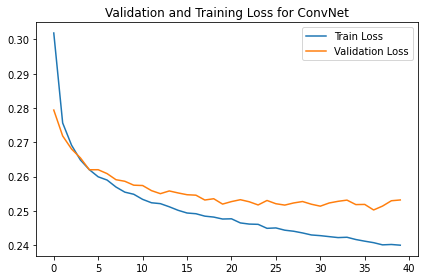

In [33]:
plt.plot(train_errors)
plt.plot(validation_errors)
plt.legend(['Train Loss','Validation Loss'])
plt.title("Validation and Training Loss for ConvNet")
plt.tight_layout()

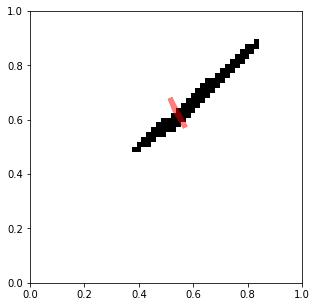

In [34]:
# *****START CODE
pred = model(val_images[0:4])[1]
visualize_prediction(val_images[1].detach().cpu(),pred.detach().cpu())
# visualize_prediction(val_images[1].detach().cpu(),val_coords[1].detach().cpu())
# *****END CODE

What we see is that after the training procedure, the fit is not quite great.

2g) Think and implement a preprocessing step that can boost the accuracy of your network

In [35]:
class TriangleDataset(Dataset):

    def __init__(self, X_train, y_train):
        self.x = X_train
        self.y = y_train
        self.n_samples = len(y_train)

    def __getitem__(self,index):
        X, y = self.x[index],self.y[index]
    
        return X, y
    
    def __len__(self):
        return self.n_samples

    
transform_train = transforms.Compose([
                        transforms.Normalize((0.5),(0.5))
                    ])
#Create a DataLoader training and validation set 
torch.set_default_dtype(torch.float32)
training_set = TriangleDataset(X_train, y_train)
validation_set = TriangleDataset(X_val,y_val)
train_dataloader = DataLoader(training_set,batch_size=4,shuffle=True)
val_dataloader = DataLoader(validation_set,batch_size=4,shuffle=True)

data_iter = iter(train_dataloader)
val_data_iter = iter(val_dataloader)
images,labels = data_iter.next()
images,labels = transform_train(images), labels
val_images, val_labels = val_data_iter.next()
val_images, val_labels = transform_train(val_images), val_labels
# *****END CODE

In [36]:
from tqdm import tqdm
train_errors, validation_errors = [],[]
for i in tqdm(range(epochs)):
    
    training_loss, validation_loss = 0.0, 0.0
    for images, coords in train_dataloader:
        images,coords = images.float(), coords.float()
        images = images.to(device)
        coords = coords.to(device)
        optimizer.zero_grad()

        # forward + backward + optimize
        output = model(images)
        #Train loss
        loss = torch.sqrt(criterion(output, coords)) #Take the RMSE of the errors 
        loss.backward()
        optimizer.step()
        #Update training loss 
        training_loss += loss.item()

        #Model Validation
    else:
        with torch.no_grad(): #Gradient tape is cancelled for validation
            for val_images, val_coords in val_dataloader:
                val_images, val_coords = val_images.float(), val_coords.float()
                val_images = val_images.to(device)
                val_coords = val_coords.to(device)
                val_output = model(val_images)
                val_loss = torch.sqrt(criterion(val_output,val_coords))
                validation_loss += val_loss.item()
                
        train_loss = training_loss/len(train_dataloader)
        valid_loss = validation_loss/len(val_dataloader)

        train_errors.append(train_loss)
        validation_errors.append(valid_loss)

#         Print epoch training
    print('Epoch: {} \tTraining Loss: {:.4f}'.format(
    i+1, train_loss))
    print('Epoch: {} \tValidation Loss: {:.4f}'.format(
    i+1, valid_loss))

print('Finished Training')


# *****END CODE

  2%|▎         | 1/40 [00:24<15:51, 24.39s/it]

Epoch: 1 	Training Loss: 0.2393
Epoch: 1 	Validation Loss: 0.2527


  5%|▌         | 2/40 [00:48<15:27, 24.39s/it]

Epoch: 2 	Training Loss: 0.2393
Epoch: 2 	Validation Loss: 0.2511


  8%|▊         | 3/40 [01:13<15:02, 24.40s/it]

Epoch: 3 	Training Loss: 0.2389
Epoch: 3 	Validation Loss: 0.2538


 10%|█         | 4/40 [01:37<14:38, 24.40s/it]

Epoch: 4 	Training Loss: 0.2379
Epoch: 4 	Validation Loss: 0.2532


 12%|█▎        | 5/40 [02:02<14:16, 24.46s/it]

Epoch: 5 	Training Loss: 0.2376
Epoch: 5 	Validation Loss: 0.2518


 15%|█▌        | 6/40 [02:26<13:51, 24.46s/it]

Epoch: 6 	Training Loss: 0.2364
Epoch: 6 	Validation Loss: 0.2535


 18%|█▊        | 7/40 [02:51<13:26, 24.45s/it]

Epoch: 7 	Training Loss: 0.2370
Epoch: 7 	Validation Loss: 0.2543


 20%|██        | 8/40 [03:15<13:02, 24.44s/it]

Epoch: 8 	Training Loss: 0.2364
Epoch: 8 	Validation Loss: 0.2540


 22%|██▎       | 9/40 [03:39<12:37, 24.45s/it]

Epoch: 9 	Training Loss: 0.2356
Epoch: 9 	Validation Loss: 0.2540


 25%|██▌       | 10/40 [04:04<12:13, 24.44s/it]

Epoch: 10 	Training Loss: 0.2347
Epoch: 10 	Validation Loss: 0.2540


 28%|██▊       | 11/40 [04:28<11:48, 24.44s/it]

Epoch: 11 	Training Loss: 0.2352
Epoch: 11 	Validation Loss: 0.2560


 30%|███       | 12/40 [04:53<11:23, 24.42s/it]

Epoch: 12 	Training Loss: 0.2348
Epoch: 12 	Validation Loss: 0.2540


 32%|███▎      | 13/40 [05:17<10:59, 24.43s/it]

Epoch: 13 	Training Loss: 0.2345
Epoch: 13 	Validation Loss: 0.2558


 35%|███▌      | 14/40 [05:42<10:35, 24.42s/it]

Epoch: 14 	Training Loss: 0.2331
Epoch: 14 	Validation Loss: 0.2566


 38%|███▊      | 15/40 [06:06<10:10, 24.42s/it]

Epoch: 15 	Training Loss: 0.2326
Epoch: 15 	Validation Loss: 0.2546


 40%|████      | 16/40 [06:30<09:46, 24.42s/it]

Epoch: 16 	Training Loss: 0.2324
Epoch: 16 	Validation Loss: 0.2552


 42%|████▎     | 17/40 [06:55<09:21, 24.42s/it]

Epoch: 17 	Training Loss: 0.2319
Epoch: 17 	Validation Loss: 0.2572


 45%|████▌     | 18/40 [07:19<08:58, 24.46s/it]

Epoch: 18 	Training Loss: 0.2311
Epoch: 18 	Validation Loss: 0.2568


 48%|████▊     | 19/40 [07:44<08:33, 24.46s/it]

Epoch: 19 	Training Loss: 0.2304
Epoch: 19 	Validation Loss: 0.2574


 50%|█████     | 20/40 [08:08<08:08, 24.42s/it]

Epoch: 20 	Training Loss: 0.2310
Epoch: 20 	Validation Loss: 0.2568


 52%|█████▎    | 21/40 [08:33<07:44, 24.43s/it]

Epoch: 21 	Training Loss: 0.2296
Epoch: 21 	Validation Loss: 0.2556


 55%|█████▌    | 22/40 [08:57<07:19, 24.42s/it]

Epoch: 22 	Training Loss: 0.2292
Epoch: 22 	Validation Loss: 0.2567


 57%|█████▊    | 23/40 [09:21<06:55, 24.42s/it]

Epoch: 23 	Training Loss: 0.2283
Epoch: 23 	Validation Loss: 0.2578


 60%|██████    | 24/40 [09:46<06:30, 24.42s/it]

Epoch: 24 	Training Loss: 0.2276
Epoch: 24 	Validation Loss: 0.2594


 62%|██████▎   | 25/40 [10:10<06:06, 24.42s/it]

Epoch: 25 	Training Loss: 0.2273
Epoch: 25 	Validation Loss: 0.2570


 65%|██████▌   | 26/40 [10:35<05:41, 24.42s/it]

Epoch: 26 	Training Loss: 0.2266
Epoch: 26 	Validation Loss: 0.2595


 68%|██████▊   | 27/40 [10:59<05:17, 24.43s/it]

Epoch: 27 	Training Loss: 0.2258
Epoch: 27 	Validation Loss: 0.2595


 70%|███████   | 28/40 [11:23<04:52, 24.41s/it]

Epoch: 28 	Training Loss: 0.2245
Epoch: 28 	Validation Loss: 0.2599


 72%|███████▎  | 29/40 [11:48<04:28, 24.45s/it]

Epoch: 29 	Training Loss: 0.2234
Epoch: 29 	Validation Loss: 0.2599


 75%|███████▌  | 30/40 [12:12<04:04, 24.43s/it]

Epoch: 30 	Training Loss: 0.2230
Epoch: 30 	Validation Loss: 0.2620


 78%|███████▊  | 31/40 [12:37<03:40, 24.47s/it]

Epoch: 31 	Training Loss: 0.2221
Epoch: 31 	Validation Loss: 0.2640


 80%|████████  | 32/40 [13:01<03:15, 24.43s/it]

Epoch: 32 	Training Loss: 0.2220
Epoch: 32 	Validation Loss: 0.2636


 82%|████████▎ | 33/40 [13:26<02:51, 24.48s/it]

Epoch: 33 	Training Loss: 0.2211
Epoch: 33 	Validation Loss: 0.2634


 85%|████████▌ | 34/40 [13:50<02:26, 24.45s/it]

Epoch: 34 	Training Loss: 0.2192
Epoch: 34 	Validation Loss: 0.2645


 88%|████████▊ | 35/40 [14:15<02:02, 24.44s/it]

Epoch: 35 	Training Loss: 0.2188
Epoch: 35 	Validation Loss: 0.2650


 90%|█████████ | 36/40 [14:39<01:37, 24.44s/it]

Epoch: 36 	Training Loss: 0.2178
Epoch: 36 	Validation Loss: 0.2645


 92%|█████████▎| 37/40 [15:04<01:13, 24.42s/it]

Epoch: 37 	Training Loss: 0.2167
Epoch: 37 	Validation Loss: 0.2648


 95%|█████████▌| 38/40 [15:28<00:48, 24.43s/it]

Epoch: 38 	Training Loss: 0.2147
Epoch: 38 	Validation Loss: 0.2660


 98%|█████████▊| 39/40 [15:52<00:24, 24.43s/it]

Epoch: 39 	Training Loss: 0.2143
Epoch: 39 	Validation Loss: 0.2684


100%|██████████| 40/40 [16:17<00:00, 24.43s/it]

Epoch: 40 	Training Loss: 0.2143
Epoch: 40 	Validation Loss: 0.2684
Finished Training


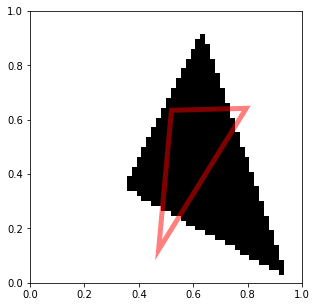

In [37]:
pred = model(val_images[0:4])[1]
visualize_prediction(val_images[1].detach().cpu(),pred.detach().cpu())

It seems that with normalization of the input X-tensor, the accuracy does jump up and we see a better prediction of the triangle's edges